# What is this notebook about?

This notebook will be under ongoing work as more dataset will be combined to create more unique insights to answer more questions. The "Final Duns" data set is about a list of instutions who get funding from IES(grant info not yet there) along with other interesting features such as DUNS, location variables, and IPEDs. 

The "notes" column gives more information on the instution such as its size, ethnicity, and gender of the individuals in that institution. This allows us to answer questions such as:

- Which instutions are getting funding and how much?
- Are we providing funding to a diverse collection of institutions?
- What's happening once the grants are received?

----

# Importing Libraries

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [14]:
duns = pd.read_excel("Final Duns.xlsx")
duns

,Institution name,DUNS,AlternateDUNS,notes,State,OPE,IPEDs,ZIP,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1st Playable Productions,787314058,NaN,Woman owned,NY,NaN,NaN,12180,NaN,NaN,NaN,
1,21st Century Partnership for STEM Education,807179697,NaN,NaN,PA,NaN,NaN,19428,NaN,NaN,NaN,NaN
2,3-C Institute for Social Development,46981549,NaN,Woman owned,NC,NaN,NaN,27713,NaN,NaN,NaN,NaN
3,AbleLink Technologies,008546678,NaN,HUBZone Owned,CO,NaN,NaN,80923,NaN,NaN,NaN,NaN
4,"Abt Associates, Inc.",43397520,NaN,NaN,MA,NaN,NaN,02138,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
511,Wyoming Department of Education,809872336,NaN,NaN,WY,NaN,NaN,82001,NaN,NaN,NaN,NaN
512,Yale University,43207562,NaN,NaN,CT,142600.0,130794.0,06511,NaN,NaN,NaN,NaN
513,Zaption,079279749,NaN,no special status,CA,NaN,NaN,91360,NaN,NaN,NaN,NaN
514,Zuni Learning Tree,080494814,NaN,Woman owned,AR,NaN,NaN,72034,NaN,NaN,NaN,NaN


In [15]:
hd2019 = pd.read_excel("hd2019.xlsx")

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [16]:
# merging both duns and hd2019 datasets
df = pd.merge(duns, hd2019)
df = df.rename(columns = {"LONGITUD":"Longitude", "LATITUDE":"Latitude"})
df

,Institution name,DUNS,AlternateDUNS,notes,State,OPE,IPEDs,ZIP,Unnamed: 8,Unnamed: 9,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,Longitude,Latitude,DFRCGID,DFRCUSCG
0,Boise State University,72995848,NaN,NaN,ID,161600.0,142115.0,83725,NaN,NaN,...,1,147,-2,16001,Ada County,1602,-116.203301,43.604284,100,1
1,Clemson University,42629816,NaN,NaN,SC,342500.0,217882.0,29634,NaN,NaN,...,1,273,-2,45077,Pickens County,4503,-82.835114,34.679381,98,1
2,DePaul University,45694130,NaN,NaN,IL,NaN,144740.0,60604,NaN,NaN,...,1,176,-2,17031,Cook County,1707,-87.627240,41.877618,103,1
3,Duke University,44387793,NaN,NaN,NC,NaN,198419.0,27708,NaN,NaN,...,1,450,-2,37063,Durham County,3701,-78.937624,36.001135,99,2
4,Emory University,66469933,NaN,NaN,GA,156400.0,139658.0,30322,NaN,NaN,...,1,122,-2,13089,DeKalb County,1305,-84.325512,33.790183,99,1
5,Florida International University,71298814,NaN,NaN,FL,963500.0,133951.0,33199,NaN,NaN,...,1,370,-2,12086,Miami-Dade County,1226,-80.373928,25.757320,96,1
6,Fordham University,71011019,NaN,NaN,NY,272200.0,191241.0,10458,NaN,NaN,...,1,408,-2,36005,Bronx County,3615,-73.882705,40.859354,103,1
7,Idaho State University,78341468,NaN,NaN,ID,162000.0,142276.0,83209,NaN,NaN,...,1,-2,-2,16005,Bannock County,1602,-112.432312,42.863832,102,1
8,Middle Tennessee State University,77648780,NaN,NaN,TN,351000.0,220978.0,37132,NaN,NaN,...,1,400,-2,47149,Rutherford County,4704,-86.360618,35.848005,104,1
9,Mills College,73929002,NaN,NaN,CA,123800.0,118888.0,94613,NaN,NaN,...,1,488,-2,6001,Alameda County,613,-122.182294,37.781425,125,1


In [17]:
#shape of data set
print(df.shape)

#focusing on a few columns via filtering this dataset
df1 = df[["Institution name","DUNS","State","ZIP","notes","OPE","IPEDs", "Longitude", "Latitude"]]
df1


(42, 83)


,Institution name,DUNS,State,ZIP,notes,OPE,IPEDs,Longitude,Latitude
0,Boise State University,72995848,ID,83725,NaN,161600.0,142115.0,-116.203301,43.604284
1,Clemson University,42629816,SC,29634,NaN,342500.0,217882.0,-82.835114,34.679381
2,DePaul University,45694130,IL,60604,NaN,NaN,144740.0,-87.627240,41.877618
3,Duke University,44387793,NC,27708,NaN,NaN,198419.0,-78.937624,36.001135
4,Emory University,66469933,GA,30322,NaN,156400.0,139658.0,-84.325512,33.790183
5,Florida International University,71298814,FL,33199,NaN,963500.0,133951.0,-80.373928,25.757320
6,Fordham University,71011019,NY,10458,NaN,272200.0,191241.0,-73.882705,40.859354
7,Idaho State University,78341468,ID,83209,NaN,162000.0,142276.0,-112.432312,42.863832
8,Middle Tennessee State University,77648780,TN,37132,NaN,351000.0,220978.0,-86.360618,35.848005
9,Mills College,73929002,CA,94613,NaN,123800.0,118888.0,-122.182294,37.781425


Up to this point in our data transformation, I have merged our 'hd2019' dataset and 'duns' dataset to create an inner join of all the data in both of these files. 

An inner join file has data that both of the files contain, you might be wondering why I did this? Since 'hd2019' and 'duns' have a lot of 'NaN'(aka NULL values) its hard to work around that. 

I'm using this inner join to experiment with a small sample and then I can simply change the type of merge for the whole table when needed.

# Visualizing the institution data

Now that we got our merged data, it's time to visualize it.

I've decided to create a map since it's the most usefule when it comes to visualizing longitude and latitude data. This is also a good oppurtunity to see which part of the United States receive funding

NOTE: the merged data only contains 41 institutions, I'll be doing a full analysis once I can ensure that the visualization works

In [18]:
import descartes
import geopandas as gpd
'''
If you can't install geopandas via pip try these commands first:
$ pip install gevent --pre
$ pip install auto-py-to-exe

if you install Anaconda you can skip the previous step and just use the command below
then use 'pip install geopandas'
'''
from shapely.geometry import Point, Polygon

&lt;AxesSubplot:&gt;

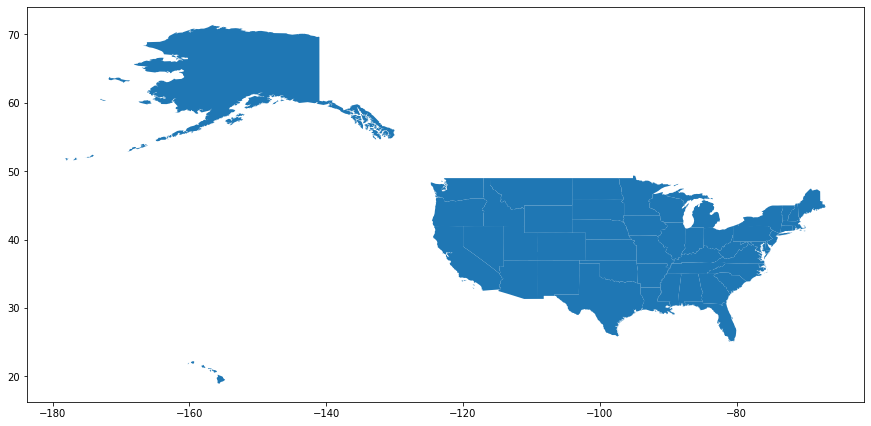

In [19]:
map = gpd.read_file("states.shp")
fig,ax = plt.subplots(figsize = (15, 15))
map.plot(ax = ax)


In [20]:
geometry = [Point(xy) for xy in zip(df1["Longitude"], df1["Latitude"])]
geometry[:3]

[&lt;shapely.geometry.point.Point at 0x4a26c70&gt;,
 &lt;shapely.geometry.point.Point at 0x4a26dd8&gt;,
 &lt;shapely.geometry.point.Point at 0x169596a0&gt;]

In [21]:
geodf = gpd.GeoDataFrame(df1, geometry = geometry)
geodf.head()


,Institution name,DUNS,State,ZIP,notes,OPE,IPEDs,Longitude,Latitude,geometry
0,Boise State University,72995848,ID,83725,NaN,161600.0,142115.0,-116.203301,43.604284,POINT (-116.20330 43.60428)
1,Clemson University,42629816,SC,29634,NaN,342500.0,217882.0,-82.835114,34.679381,POINT (-82.83511 34.67938)
2,DePaul University,45694130,IL,60604,NaN,NaN,144740.0,-87.627240,41.877618,POINT (-87.62724 41.87762)
3,Duke University,44387793,NC,27708,NaN,NaN,198419.0,-78.937624,36.001135,POINT (-78.93762 36.00113)
4,Emory University,66469933,GA,30322,NaN,156400.0,139658.0,-84.325512,33.790183,POINT (-84.32551 33.79018)


&lt;matplotlib.legend.Legend at 0x4d51118&gt;

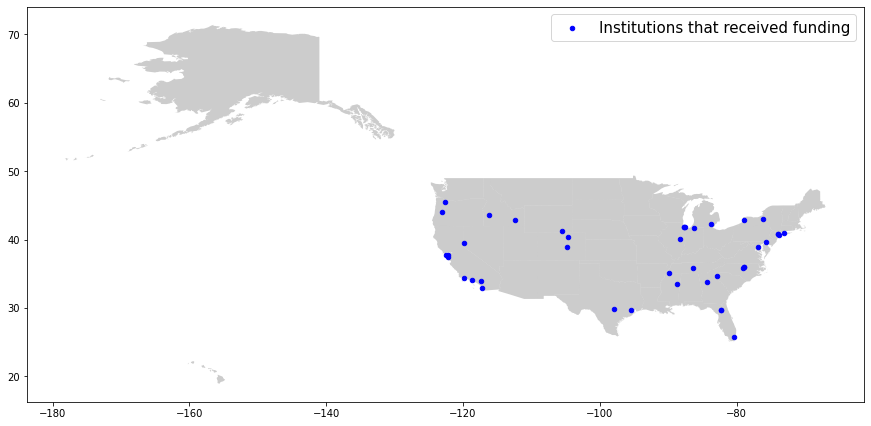

In [22]:
fig,ax = plt.subplots(figsize = (15, 15))
map.plot(ax = ax, alpha = 0.4, color = "grey")
geodf.plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Institutions that received funding")
plt.legend(prop={'size':15})

# Further Data Transformation 

In [23]:
dun2 = duns[duns["Institution name"].str.contains("University") | duns["Institution name"].str.contains("College")]
dun2


,Institution name,DUNS,AlternateDUNS,notes,State,OPE,IPEDs,ZIP,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
27,Arizona State University,943360412,NaN,NaN,AZ,NaN,NaN,85281,NaN,NaN,NaN,NaN
34,Baylor University,7516735,NaN,NaN,TX,354500.0,223232.0,76706,NaN,NaN,NaN,NaN
39,Boise State University,72995848,NaN,NaN,ID,161600.0,142115.0,83725,NaN,NaN,NaN,NaN
40,Boston College,45896339,NaN,NaN,MA,212800.0,164924.0,02467,NaN,NaN,NaN,NaN
41,Boston University,49435266,NaN,NaN,MA,213000.0,164988.0,02215,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
501,"Washington University, St. Louis",68552207,NaN,NaN,MO,252000.0,179867.0,63130,NaN,NaN,NaN,NaN
503,Wayne State University,001962224,NaN,NaN,MI,NaN,172644.0,48202,NaN,NaN,NaN,NaN
504,Weber State University,73000895,NaN,NaN,UT,368000.0,230782.0,84408,NaN,NaN,NaN,NaN
507,Western Michigan University,622364479,NaN,NaN,MI,NaN,NaN,49008,NaN,NaN,NaN,NaN


The output above tells us that in the 'Final Duns' excel sheet, only 186 universities and colleges have a duns ID attached to the institutions.

In [34]:
joined = pd.merge(duns, hd2019, on = "DUNS", how = "inner")
joined

,Institution name,DUNS,AlternateDUNS,notes,State,OPE,IPEDs,ZIP_x,Unnamed: 8,Unnamed: 9,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,Boise State University,72995848,NaN,NaN,ID,161600.0,142115.0,83725,NaN,NaN,...,1,147,-2,16001,Ada County,1602,-116.203301,43.604284,100,1
1,Boston College,45896339,NaN,NaN,MA,212800.0,164924.0,02467,NaN,NaN,...,1,148,71650,25017,Middlesex County,2504,-71.169242,42.336213,99,1
2,Brown University,1785542,NaN,NaN,RI,340100.0,217156.0,02912,NaN,NaN,...,1,148,77200,44007,Providence County,4401,-71.403850,41.826170,99,1
3,"California State University, Los Angeles",66697590,NaN,NaN,CA,NaN,110592.0,90032,NaN,NaN,...,1,348,-2,6037,Los Angeles County,634,-118.168965,34.066927,109,1
4,"California State University, Sacramento",29031796,NaN,Not 100% sure of DUNS because not yet in G5 fo...,CA,NaN,110617.0,95819,NaN,NaN,...,1,472,-2,6067,Sacramento County,606,-121.423549,38.559415,109,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,"Washington University, St. Louis",68552207,NaN,NaN,MO,252000.0,179867.0,63130,NaN,NaN,...,1,476,-2,29189,St. Louis County,2901,-90.310604,38.647929,99,1
193,Weber State University,73000895,NaN,NaN,UT,368000.0,230782.0,84408,NaN,NaN,...,1,482,-2,49057,Weber County,4901,-111.944845,41.192591,109,2
194,Western Michigan University,622364479,NaN,NaN,MI,NaN,NaN,49008,NaN,NaN,...,1,310,-2,26077,Kalamazoo County,2606,-85.613759,42.282194,100,1
195,Worcester Polytechnic Institute,41508581,NaN,NaN,MA,223300.0,168421.0,01609,NaN,NaN,...,1,148,79600,25027,Worcester County,2502,-71.808339,42.274853,103,1


The code output above shows that the intersection(inner join) of duns and hd2019 based on the 'DUNS' column is 197 institutions that exist in  both the 'Final Duns' excel sheet as well as 'hd2019' sheet, this shows that 197 institutions exist in both datasets. I chose 'DUNS' since it's a common variable in both the sheets as well as the fact that it's a unique identifier for institutions that received grants. 

In [48]:
#to get the combined data set by removing the repeated institutions
joined2 = pd.merge(duns, hd2019,  on = "DUNS",how = "outer")
joined2.head(),joined2.shape


(                              Institution name       DUNS  AlternateDUNS  \
 0                     1st Playable Productions  787314058            NaN   
 1  21st Century Partnership for STEM Education  807179697            NaN   
 2         3-C Institute for Social Development   46981549            NaN   
 3                        AbleLink Technologies  008546678            NaN   
 4                         Abt Associates, Inc.   43397520            NaN   
 
            notes State  OPE  IPEDs  ZIP_x  Unnamed: 8  Unnamed: 9  ...  \
 0    Woman owned    NY  NaN    NaN  12180         NaN         NaN  ...   
 1            NaN    PA  NaN    NaN  19428         NaN         NaN  ...   
 2    Woman owned    NC  NaN    NaN  27713         NaN         NaN  ...   
 3  HUBZone Owned    CO  NaN    NaN  80923         NaN         NaN  ...   
 4            NaN    MA  NaN    NaN  02138         NaN         NaN  ...   
 
    CBSATYPE CSA  NECTA COUNTYCD COUNTYNM CNGDSTCD LONGITUD LATITUDE DFRCGID  \
 0  

In [51]:
filter = joined2[["Institution name","DUNS","IPEDs","OPEID","UNITID","ZIP_x","SECTOR","HBCU","TRIBAL","LOCALE","OPENPUBL","CARNEGIE","notes"]]
filter.head(), filter.shape

(                              Institution name       DUNS  IPEDs  OPEID  \
 0                     1st Playable Productions  787314058    NaN    NaN   
 1  21st Century Partnership for STEM Education  807179697    NaN    NaN   
 2         3-C Institute for Social Development   46981549    NaN    NaN   
 3                        AbleLink Technologies  008546678    NaN    NaN   
 4                         Abt Associates, Inc.   43397520    NaN    NaN   
 
    UNITID  ZIP_x  SECTOR  HBCU  TRIBAL  LOCALE  OPENPUBL  CARNEGIE  \
 0     NaN  12180     NaN   NaN     NaN     NaN       NaN       NaN   
 1     NaN  19428     NaN   NaN     NaN     NaN       NaN       NaN   
 2     NaN  27713     NaN   NaN     NaN     NaN       NaN       NaN   
 3     NaN  80923     NaN   NaN     NaN     NaN       NaN       NaN   
 4     NaN  02138     NaN   NaN     NaN     NaN       NaN       NaN   
 
            notes  
 0    Woman owned  
 1            NaN  
 2    Woman owned  
 3  HUBZone Owned  
 4            

In [53]:
#exporting the final filtered doc to csv
filter.to_csv("output.csv")